In [69]:
##Assignment 2 


In [2]:
#Pipeline:
# Import text 
# Pre-normalizing descriptive statistics 
# normalize text 
# Post-normalizing descriptive statistics
# Syntactic Complexity Analysis 
# Error recognigiton 

In [6]:
# Import text
# Pre-normalizing descriptive statistics


# import Gachon 
import os
from nltk.tokenize import word_tokenize

def process_files(directory, predicate):
    folder_names = os.listdir(directory)
    result=[]
    length = 0
    for folder in folder_names:
        if folder == ".DS_Store":
            continue
        file_names = os.listdir(directory+folder)
        for file in file_names:
            path = directory + folder + "/" + file
            with open (path, 'r', encoding = "ISO-8859-1") as f:
                text = f.read()
                value = predicate(text)
                result.append(value)
    return result

#import LOCNESS

file = open("/Users/alexwang/Documents/NLP/Assignment2/Loc.rtf", "r")
Loctext = file.read()

def tokencount(t):
    tokens = word_tokenize(t)
    tokencount = len(tokens)
    return tokencount 

#print out pre-munging the number of tokens 
print("the number of tokens in LOCNESS is", tokencount(Loctext))

directory = "/Users/alexwang/Documents/NLP/Assignment2/Corpora for Project 2/Gachon/"

print("the number of tokens in Gachon is" , sum(process_files(directory,tokencount)))

print(" the number of character in LOCNESS is", len(Loctext))

Loc_length = len(Loctext)


print(" the number of character in Gachon is", sum(process_files(directory, len)))

Gachon_length = sum(process_files(directory, len))

the number of tokens in LOCNESS is 174174


KeyboardInterrupt: 

In [ ]:
# normalize text 

from nltk.tokenize import sent_tokenize,word_tokenize
import re

def normalize_stats(t):
    sents = sent_tokenize(t)
    t = re.sub(r'[^\w\s]','',t) #needs more explanation 
    tokens = word_tokenize(t)
    return len(tokens),len(sents)

                           
#Statistics after removing punctuation


#LOCNESS
print("The post-normalized number of tokens and number of sentence tokens of LOCNESS are " , normalize_stats(Loctext), "respectively")


#Gachon 
token_info_list = process_files(directory,normalize_stats)
token_count = 0
sents_count = 0
for row in token_info_list:
    token_count += row[0]
    sents_count += row[1]
print("After normalizing, the number of tokens in Gachon is" ,token_count)
print("After normalizing, the number of sentence tokens in Gachon is", sents_count)


In [ ]:
#Syntactic Complexity 
#T-units per sentence 

# A T-unit consists of an independent clause and any dependent clauses attached to it.
import re

def conjunction_count(t):
    co_con = ['for','and','nor','but','or','yet','so']
    result = []
    m = re.findall(r'(?<=(,|;)\s)(for|and|nor|but|or|yet|so)\s', t)
    result.append(m)
    return len(m)


print("The number of T-units of LOCNESS is",conjunction_count(Loctext) + 7658)
print("The number of T-units of Gachon is", sum(process_files(directory,conjunction_count))+ 147540)

         
#T-units ratio 
#LOCNESS
print("The T unit ratio in LOCNESS is", (conjunction_count(Loctext) + 7658)/Loc_length)

#Gachon
print("The T unit ratio in Gachon is", (sum(process_files(directory,conjunction_count))+ 147540)/Gachon_length)




In [ ]:
#Prepositional Phrase 
from nltk import pos_tag
import nltk

def prepp(t):
    Prep_grammar = "PP: {<IN><DT><JJ>*<NN.*.*>}"
    cp = nltk.RegexpParser(Prep_grammar) 
    result = cp.parse(pos_tag(word_tokenize(t)))
    chunking_length = 0
    for subtree in result.subtrees():
        if subtree.label() == 'PP':
            chunking_length += 1
    return chunking_length
        

print("the number of prepositonal phrase in LOCNESS is", prepp(Loctext))
print("the number of prepositonal phrase in Gachon is", sum(process_files(directory,prepp)))

#ratio 
print("the prepositonal phrase raito in LOCNESS is",(prepp(Loctext)/Loc_length)*100)
print("the prepositonal phrase raito in Gachon is", (sum(process_files(directory,prepp))/Gachon_length)*100)


In [ ]:
#clauses per sentence 
def relative_count_adverb(t):
    adverb_grammar = "error: {<NN.*><WRB>}"
    cp = nltk.RegexpParser(adverb_grammar) 
    result = cp.parse(pos_tag(word_tokenize(t)))
    adverb_length = 0
    adverb_list = []
    for subtree in result:
        if isinstance(subtree, Tree):
            adverb_length +=1
    return adverb_length

def relative_count_pronoun(t):
    pronoun_grammar = "error: {<NN.*><WP>}"
    cp = nltk.RegexpParser(pronoun_grammar) 
    result = cp.parse(pos_tag(word_tokenize(t)))
    pronoun_length = 0
    pronoun_list = []
    for subtree in result:
        if isinstance(subtree, Tree):
            pronoun_list.append(subtree)        
    for t in pronoun_list:
        if t[0][0] != 'what':
            pronoun_length  += 1
    return pronoun_length




print(relative_count_adverb(Loctext) + relative_count_pronoun(Loctext))
directory = "/Users/alexwang/Documents/NLP/Assignment2/Corpora for Project 2/Gachon/"
print(sum(process_files(directory,relative_count_adverb)))
print(sum(process_files(directory,relative_count_pronoun)))


In [ ]:
#Passive Voice 

import nltk 
from nltk.tokenize import word_tokenize, sent_tokenize
import re
from nltk.tree import *


def passivecount(t):
    wordsList = nltk.word_tokenize(t) 
    tagged = nltk.pos_tag(wordsList) 
    passivegram = r"""Chunk: {<VB.?><VBN><VBN>?}"""
    passiveparser = nltk.RegexpParser(passivegram)
    result = passiveparser.parse(tagged)
    passive_list = []
    passive_count = 0
    be_list = [('was', 'VBD'),('is', 'VBZ'),('are', 'VBP'),('were', 'VBD'),('be', 'VB'),('been', 'VBN'),('being', 'VBG')] 
    for node in result:
        if isinstance(node, Tree):
            passive_list.append(node)
    for tree in passive_list:
        if tree[0] in be_list:
            passive_count +=1
    return passive_count

print(passivecount(Loctext))
print(sum(process_files(directory,passivecount)))




In [ ]:
# rule-based errors 
# the superlative 

from nltk import pos_tag
import nltk
from nltk.tree import *

#there are two forms of superlatives, and they are measured seperately 
# the + adverb (most) + adjective + noun
def superlativeerror(t):
    Prep_grammar = "error: {<...*><RBS><JJ><NN.*>}"
    cp = nltk.RegexpParser(Prep_grammar) 
    result = cp.parse(pos_tag(word_tokenize(t)))
    error_length = 0
    super_list = []
    for subtree in result:
        if isinstance(subtree, Tree):
            super_list.append(subtree)
    for t in super_list:
        if t[0][1] != 'DT':
            error_length += 1
    return error_length

# the + superlatives + noun 
def superlativeerror2(t):
    Prep_grammar = "error: {<...*><JJS><NN.*>}"
    cp = nltk.RegexpParser(Prep_grammar) 
    result = cp.parse(pos_tag(word_tokenize(t)))
    error_length = 0
    super_list = []
    for subtree in result:
        if isinstance(subtree, Tree):
            super_list.append(subtree)
    for t in super_list:
        if t[0][1] != 'DT':
            error_length += 1
    return error_length

print("The number of superlative error in LOCNESS is", superlativeerror(Loctext) + superlativeerror2(Loctext))
print("The number of superlative error in Gachon is ",sum(process_files(directory, superlativeerror)) +sum(process_files(directory, superlativeerror2)))


In [ ]:

# rule-based errors 

#indefinite article + plural nouns
from nltk import pos_tag
import nltk
from nltk.tree import *

def articleerror(t):
    Prep_grammar = "error: {<DT><NNS>}"
    cp = nltk.RegexpParser(Prep_grammar) 
    result = cp.parse(pos_tag(word_tokenize(t)))
    error_length = 0
    tree_list = []
    for tree in result:
        if isinstance(tree, Tree):
            tree_list.append(tree)
    for subtree in tree_list:
        if subtree[0][0] in ['a','an']:
            error_length +=1
    return error_length

print("The number of indefinite article errors in LOCNESS is", articleerror(Loctext))
print("The number of indefinite article errors in Gachon is", sum(process_files(directory, articleerror)))

print("The indefinite article errors ratio in LOCNESS is", (articleerror(Loctext)/Loc_length)*100)
print("The indefinite article errors ratio in Gachon is", (sum(process_files(directory, articleerror))/Gachon_length)*100)



In [ ]:
# to did error 
from nltk import pos_tag
from nltk.tree import *

def toerror(t):
    to_grammar = 'CHUNK: {<TO> <VBD>}'
    cp = nltk.RegexpParser(to_grammar) 
    result = cp.parse(pos_tag(word_tokenize(t)))
    error_length = 0
    tree_list = []
    for tree in result:
        if isinstance(tree, Tree):
            tree_list.append(tree)
    for subtree in tree_list:
        if subtree.label() == 'CHUNK': 
            error_length +=1
    return error_length


print(toerror(Loctext))
print(sum(process_files(directory, toerror)))

In [94]:
# each error 

from nltk import pos_tag
from nltk.tree import *

def eacherror(t):
    cp = nltk.RegexpParser('CHUNK: { <DT> <NNS>}')
    result = cp.parse(pos_tag(word_tokenize(t)))
    error_length = 0
    tree_list = []
    for tree in result:
        if isinstance(tree, Tree):
            tree_list.append(tree)
    for subtree in tree_list: 
        if subtree[0][0] in ['each']:
            error_length +=1
    return error_length

print(eacherror(Loctext))
print(sum(process_files(directory, eacherror)))
            



1
99


496
2514
2960


The superlative error in LOCNESS is 83
The superlative error in Gachon is  2533


In [ ]:
#spelling error check 

In [1]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('/Users/alexwang/Documents/NLP/Assignment2/big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

def spellCheck(sent):
    error = 0
    for word in sent.lower().split():
        x = word
        y = correction(word)
        if x != y:
            error += 1  
    return error 






NameError: name 'Loctext' is not defined

In [11]:
from nltk.tokenize import word_tokenize
file = open("/Users/alexwang/Documents/NLP/Assignment2/Loc.rtf", "r")
Loctext = file.read()
Loctext = Loctext.lower()
tokens = word_tokenize(Loctext)
print(tokens)

error = 0
for word in tokens:
    x = word
    y = correction(word)
    if x != y:
        error += 1
print(error)



['{', '\\rtf1\\ansi\\ansicpg1252\\cocoartf2513', '\\cocoatextscaling0\\cocoaplatform0', '{', '\\fonttbl\\f0\\fswiss\\fcharset0', 'helvetica', ';', '}', '{', '\\colortbl', ';', '\\red255\\green255\\blue255', ';', '}', '{', '\\', '*', '\\expandedcolortbl', ';', ';', '}', '\\margl1440\\margr1440\\vieww10800\\viewh8400\\viewkind0', '\\pard\\tx720\\tx1440\\tx2160\\tx2880\\tx3600\\tx4320\\tx5040\\tx5760\\tx6480\\tx7200\\tx7920\\tx8640\\pardirnatural\\partightenfactor0', '\\f0\\fs24', '\\cf0', '\\', '\\', 'the', 'source', 'of', 'human', 'existence', 'has', 'been', 'questioned', 'since', 'the', 'beginning', 'of', '\\', 'time', '.', 'most', 'people', 'have', 'pondered', 'at', 'some', 'point', 'in', 'their', 'lives', 'this', 'and', '\\', 'other', 'related', 'questions', ',', 'such', 'as', 'what', 'caused', 'the', 'universe', 'to', 'come', 'into', '\\', 'existence', '?', 'the', 'more', 'attempts', 'to', 'answer', 'these', 'questions', ',', 'the', 'more', 'ways', 'in', '\\', 'which', 'it', 'is', '

KeyboardInterrupt: 

In [18]:
from nltk.tokenize import word_tokenize,sent_tokenize
import time 
file = open("/Users/alexwang/Documents/NLP/Assignment2/Loc.rtf", "r")
Loctext = file.read()
Loctext = Loctext.lower()
tokens = word_tokenize(Loctext)
#sents = sent_tokenize(Loctext)
#print(tokens)

start = time.time()
error = 0
for word in tokens[:10000]:
    x = word
    y = correction(word)
    if x != y:
        error += 1
print(error)
end = time.time()

elapsed = end - start 
print(elapsed)


1874
117.88966298103333


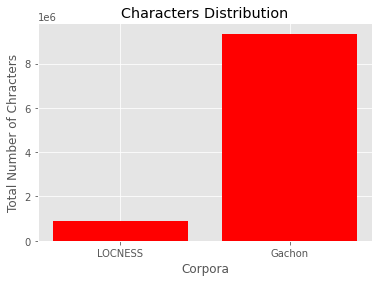

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


x = ['LOCNESS',"Gachon"] 
y = [889175,9346934] 

x_bar = [i for i, _ in enumerate(x)]

plt.bar(x_bar, y, color='red')
plt.xlabel("Corpora")
plt.ylabel("Total Number of Chracters")
plt.title("Characters Distribution")

plt.xticks(x_bar, x)

plt.show()


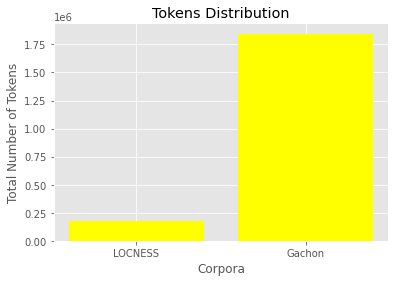

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


x = ['LOCNESS',"Gachon"] 
y = [174174,1845294] 

x_bar = [i for i, _ in enumerate(x)]

plt.bar(x_bar, y, color='Yellow')
plt.xlabel("Corpora")
plt.ylabel("Total Number of Tokens")
plt.title("Tokens Distribution")

plt.xticks(x_bar, x)

plt.show()


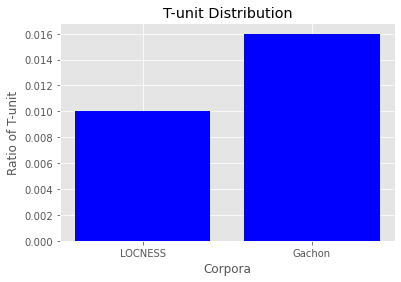

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


x = ['LOCNESS',"Gachon"] 
y = [0.01,0.016] 

x_bar = [i for i, _ in enumerate(x)]

plt.bar(x_bar, y, color='blue')
plt.xlabel("Corpora")
plt.ylabel("Ratio of T-unit")
plt.title("T-unit Distribution")

plt.xticks(x_bar, x)

plt.show()


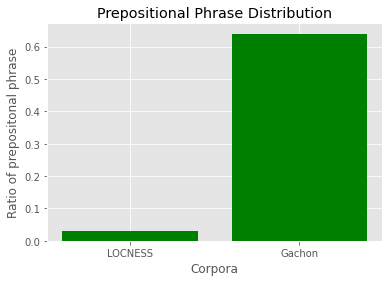

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


x = ['LOCNESS',"Gachon"] 
y = [0.03,0.64] 

x_bar = [i for i, _ in enumerate(x)]

plt.bar(x_bar, y, color='green')
plt.xlabel("Corpora")
plt.ylabel("Ratio of prepositonal phrase")
plt.title("Prepositional Phrase Distribution")

plt.xticks(x_bar, x)

plt.show()

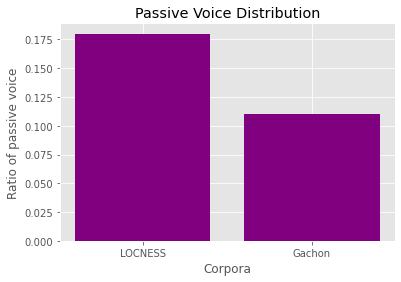

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


x = ['LOCNESS',"Gachon"] 
y = [0.18,0.11] 

x_bar = [i for i, _ in enumerate(x)]

plt.bar(x_bar, y, color='purple')
plt.xlabel("Corpora")
plt.ylabel("Ratio of passive voice")
plt.title("Passive Voice Distribution")

plt.xticks(x_bar, x)

plt.show()

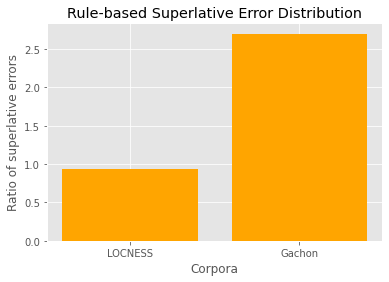

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


x = ['LOCNESS',"Gachon"] 
y = [0.93,2.7] 

x_bar = [i for i, _ in enumerate(x)]

plt.bar(x_bar, y, color='orange')
plt.xlabel("Corpora")
plt.ylabel("Ratio of superlative errors")
plt.title("Rule-based Superlative Error Distribution")

plt.xticks(x_bar, x)

plt.show()

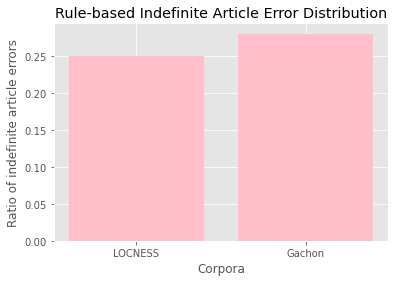

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


x = ['LOCNESS',"Gachon"] 
y = [0.25,0.28] 

x_bar = [i for i, _ in enumerate(x)]

plt.bar(x_bar, y, color='pink')
plt.xlabel("Corpora")
plt.ylabel("Ratio of indefinite article errors")
plt.title("Rule-based Indefinite Article Error Distribution")

plt.xticks(x_bar, x)

plt.show()

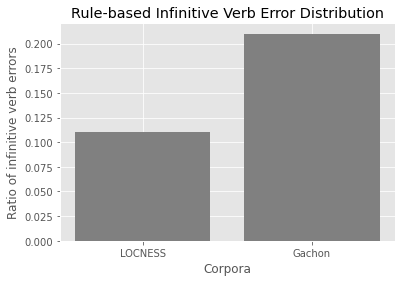

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


x = ['LOCNESS',"Gachon"] 
y = [0.11,0.21] 

x_bar = [i for i, _ in enumerate(x)]

plt.bar(x_bar, y, color='gray')
plt.xlabel("Corpora")
plt.ylabel("Ratio of infinitive verb errors")
plt.title("Rule-based Infinitive Verb Error Distribution")

plt.xticks(x_bar, x)

plt.show()

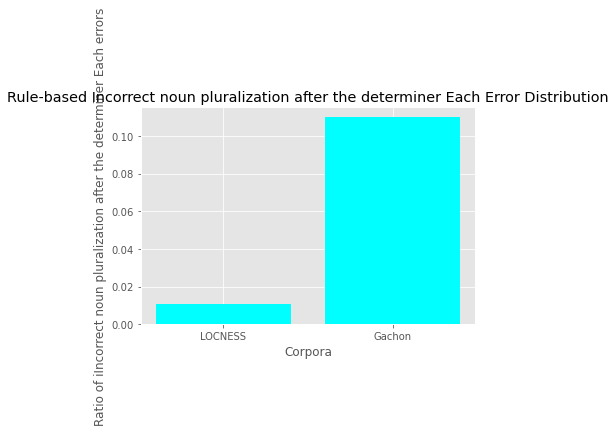

In [105]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


x = ['LOCNESS',"Gachon"] 
y = [0.011,0.11] 

x_bar = [i for i, _ in enumerate(x)]

plt.bar(x_bar, y, color='cyan')
plt.xlabel("Corpora")
plt.ylabel("Ratio of iIncorrect noun pluralization after the determiner Each errors")
plt.title("Rule-based Incorrect noun pluralization after the determiner Each Error Distribution")

plt.xticks(x_bar, x)

plt.show()